In [1]:
#The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.
#Also, certain attributes of each product and store have been defined. 
#The aim is to build a predictive model and find out the sales of each product at a particular store. 
#Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing
#sales.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
 
import warnings 
%matplotlib inline 
warnings.filterwarnings('ignore')

In [3]:
train= pd.read_csv(r'D:\Data\train.csv')
test=pd.read_csv(r'D:\Data\test.csv')

In [4]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
train["source"]="train"
test["source"] = "test"
 

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'source'],
      dtype='object')

In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [8]:
df=pd.concat([train, test], ignore_index= True)

In [9]:
df.shape

(14204, 13)

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [12]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

In [13]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [14]:
cat_col=[]
for items in train.dtypes.index:
    if train.dtypes[items] == object:
        cat_col.append(items)

In [15]:
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

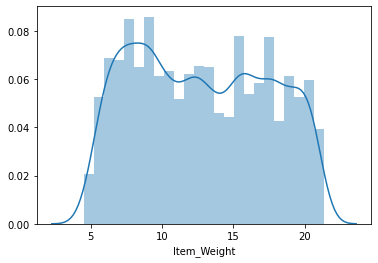

In [16]:
sns.distplot(df["Item_Weight"])

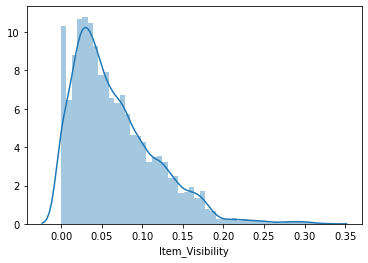

In [17]:
sns.distplot(df["Item_Visibility"])

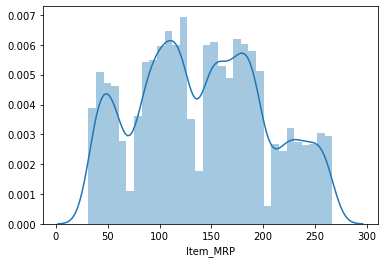

In [18]:
sns.distplot(df["Item_MRP"])

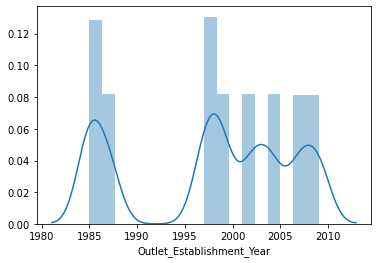

In [19]:
sns.distplot(df["Outlet_Establishment_Year"])

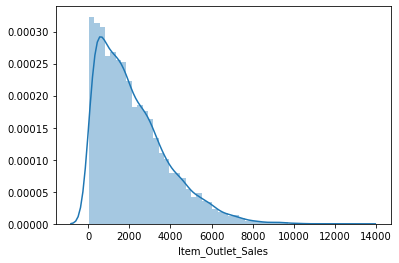

In [20]:
sns.distplot(df["Item_Outlet_Sales"])

In [21]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [22]:
from pyforest import *
lazy_imports()

['import statistics',
 'from sklearn.ensemble import RandomForestRegressor',
 'import plotly.express as px',
 'import plotly.graph_objs as go',
 'from sklearn.model_selection import train_test_split',
 'import dash',
 'import os',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn import svm',
 'import sys',
 'import lightgbm as lgb',
 'import pandas as pd',
 'import tensorflow as tf',
 'import gensim',
 'import altair as alt',
 'import glob',
 'import pydot',
 'from sklearn.manifold import TSNE',
 'import tqdm',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.preprocessing import OneHotEncoder',
 'from dask import dataframe as dd',
 'import pickle',
 'import spacy',
 'import numpy as np',
 'import matplotlib as mpl',
 'import awswrangler as wr',
 'from sklearn.ensemble import RandomForestClassifier',
 'import xgboost as xgb',
 'import seaborn as sns',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import matplotlib.p

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

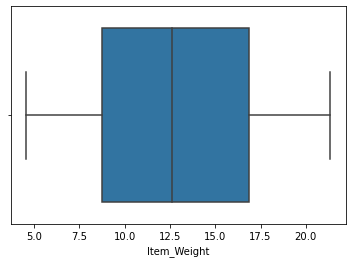

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

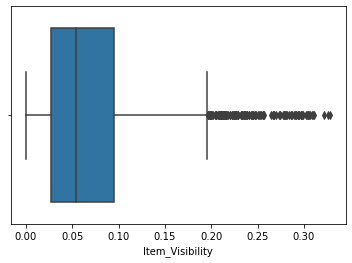

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

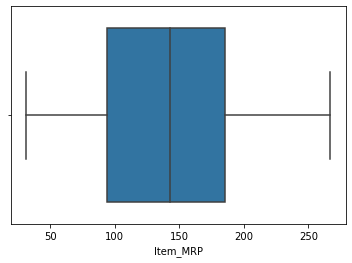

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

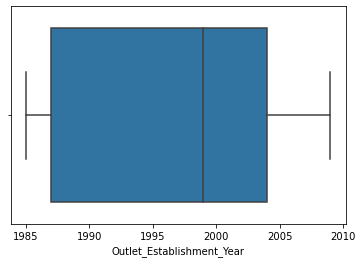

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

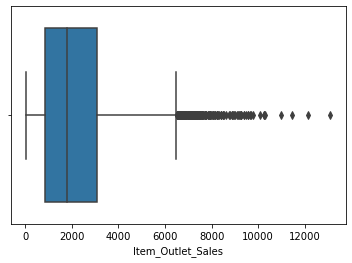

In [23]:
for i in train.describe().columns:
    sns.boxplot(train[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

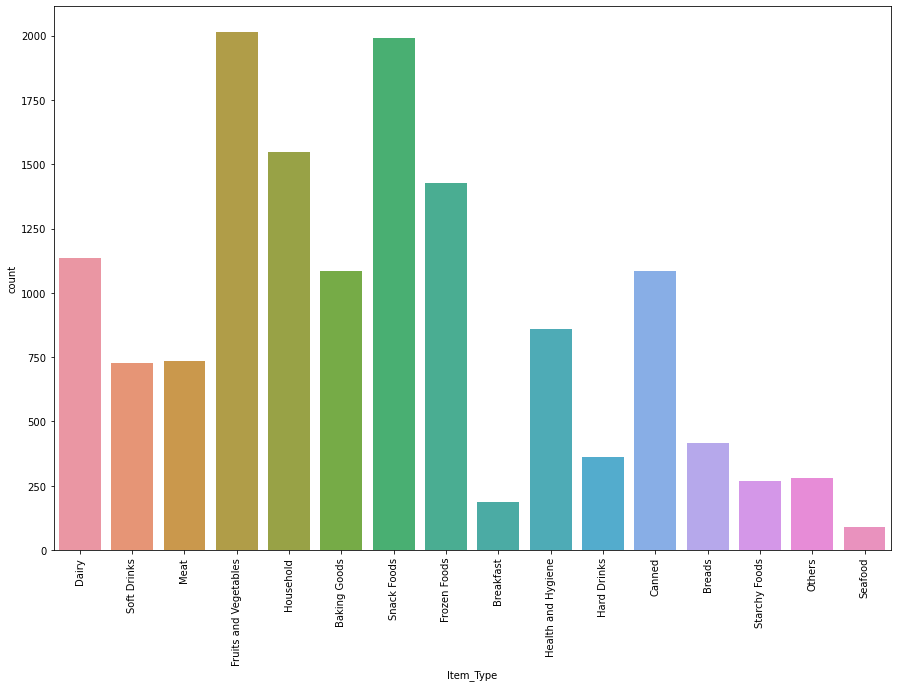

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(df["Item_Type"])
plt.xticks(rotation=90)

In [25]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [26]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [27]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

<IPython.core.display.Javascript object>

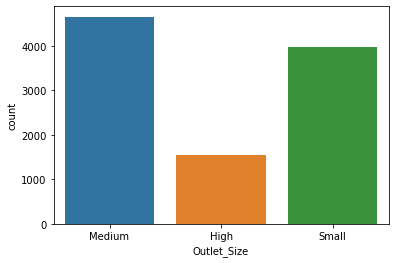

In [28]:
sns.countplot(df["Outlet_Size"])

<IPython.core.display.Javascript object>

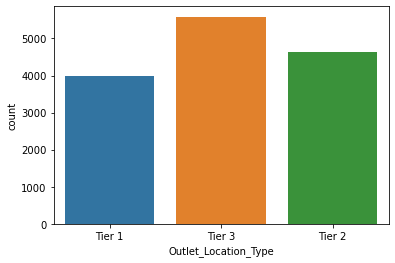

In [29]:
sns.countplot(df["Outlet_Location_Type"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

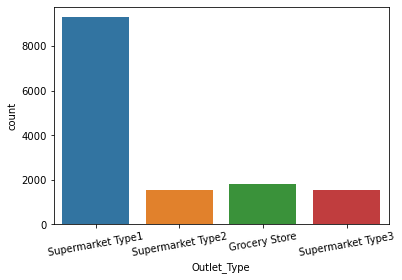

In [30]:
sns.countplot(df["Outlet_Type"])
plt.xticks(rotation=10)

In [31]:
df["Outlet_Type"].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [32]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [33]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [34]:
df["Item_Fat_Content"]= df["Item_Fat_Content"].replace({"LF":"Low Fat", "low fat":"Low Fat", "reg": "Regular"})

In [35]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [36]:
##see the impact of fat content on sale
Item_Fat_Content_pivot=df.pivot_table(index="Item_Fat_Content", values="Item_Outlet_Sales", aggfunc=np.median)

<IPython.core.display.Javascript object>

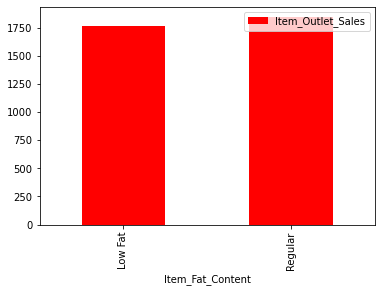

In [37]:
Item_Fat_Content_pivot.plot(kind="bar", color="red")

<IPython.core.display.Javascript object>

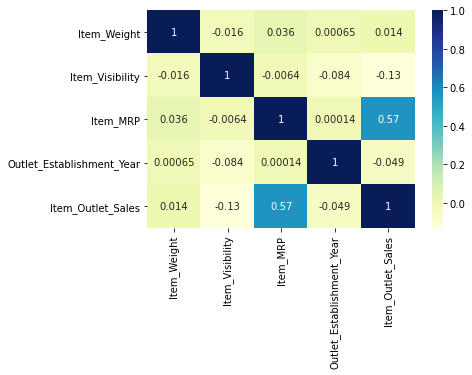

In [38]:
 sns.heatmap(df.corr(), annot=True, cmap= "YlGnBu")

In [39]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [40]:
 df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [41]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)
df["Item_Outlet_Sales"].fillna(df["Item_Outlet_Sales"].mean(), inplace=True)

In [42]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [43]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [44]:
 df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0], inplace=True)

In [45]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [46]:
sum(df["Item_Visibility"] == 0)

879

In [47]:
df.loc[:, "Item_Visibility"].replace([0], train["Item_Visibility"].mean(), inplace=True )

In [48]:
sum(df["Item_Visibility"]==0)

0

In [49]:
df["Outlet_years"]=2019-df["Outlet_Establishment_Year"]

<IPython.core.display.Javascript object>

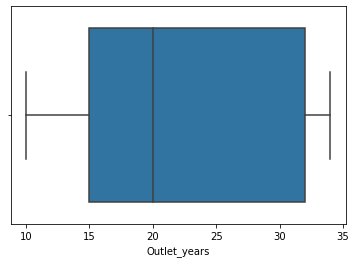

In [50]:
sns.boxplot(df["Outlet_years"])

In [51]:
from numpy import percentile
q25, q75 = percentile(df["Outlet_Establishment_Year"], 25), percentile(df["Outlet_Establishment_Year"], 75)
iqr= q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
 
outliers_removed = [x for x in df["Outlet_Establishment_Year"] if x >= lower and x <= upper]

In [52]:
 outliers = [x for x in df["Outlet_Establishment_Year"] if x < lower or x > upper]

In [53]:
outliers

[]

<IPython.core.display.Javascript object>

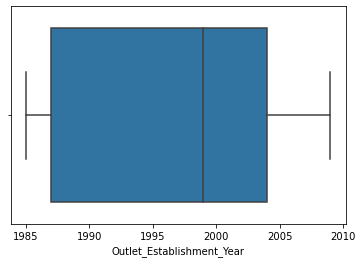

In [54]:
sns.boxplot(df["Outlet_Establishment_Year"])

In [55]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Outlet_years                   int64
dtype: object

In [56]:
df["Item_Identifier"].value_counts()

FDQ28    10
DRA24    10
DRK13    10
DRB25    10
FDM22    10
         ..
NCW54     7
FDR51     7
FDH58     7
NCL42     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [57]:
df["New_Item_type"] = df["Item_Identifier"].apply(lambda x: x[ :2])

In [58]:
df["New_Item_type"].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_type, dtype: int64

In [59]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_years,New_Item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,20,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,10,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,20,FD
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,21,FD
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,32,NC


In [60]:
df["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [61]:
Item_Fat_Content_pivot=df.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)

<IPython.core.display.Javascript object>

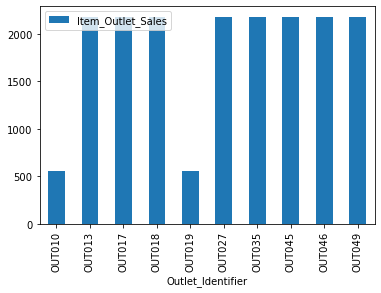

In [62]:
Item_Fat_Content_pivot.plot(kind= "bar")

In [64]:
from sklearn.preprocessing import LabelEncoder
lable =LabelEncoder()
df["Outlet"]=lable.fit_transform(df["Outlet_Identifier"])
var=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "New_Item_type","Outlet_Type", "Item_Type"]
for i in var:
    df[i]=lable.fit_transform(df[i])

In [65]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
source                        object
Outlet_years                   int64
New_Item_type                  int32
Outlet                         int32
dtype: object

In [ ]:
df=pd.get_dummies(df, columns= ["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "New_Item_type","Outlet"])

In [ ]:
df.dtypes

In [ ]:
df.isna().sum()

In [ ]:
###MODEL BUILDING


In [ ]:
df.drop(["Item_Type", "Outlet_Establishment_Year"], axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
train=df.loc[df["source"]== "train"]
test=df.loc[df["source"]== "test"]

In [ ]:
 test.shape, train.shape

In [ ]:
X_train=train.drop(["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier", "source"], axis=1)
y_train=train["Item_Outlet_Sales"]

In [ ]:
X_test=test.drop(["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier", "source"], axis=1)
y_test=test["Item_Outlet_Sales"]



In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
lm_pred = lm.predict(X_test)

In [ ]:
lm_pred

In [ ]:
 from sklearn.metrics import mean_squared_error

In [ ]:
p_train=lm.predict(X_train)

residual_train=p_train-y_train

rmse_lm_train=np.sqrt(np.dot(residual_train,residual_train)/len(p_train))

rmse_lm_train

In [ ]:
np.sqrt(mean_squared_error(y_train, p_train))

In [ ]:
p_test=lm.predict(X_train)

In [ ]:
np.sqrt(mean_squared_error(y_train, p_train))

In [ ]:
coefs=lm.coef_
features=X_train.columns
list(zip(features,coefs))

In [ ]:
## Standardize the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
X_train.columns

In [ ]:
pipeline = Pipeline([("std_scaler" , MinMaxScaler())])

In [ ]:
col_trans = ColumnTransformer([('numeric', pipeline,['Item_Weight', 'Item_Visibility', 'Item_MRP', "Outlet_years"])], remainder="passthrough")

In [ ]:
col_trans

In [ ]:
train_trans = col_trans.fit_transform(X_train)
test_trans = col_trans.transform(X_test)

In [ ]:
lm = LinearRegression()
lm.fit(train_trans, y_train)

In [ ]:
lm.coef_

In [ ]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()

In [ ]:
ridge.fit(train_trans, y_train)

In [ ]:
ridge.coef_

In [ ]:
lasso = Lasso(alpha = 0.02)

In [ ]:
lasso.fit(train_trans, y_train)

In [ ]:
train.isnull().sum()

In [ ]:
lasso.coef_

In [ ]:
X_train.columns

In [ ]:
x_prime=X_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1','Outlet_Size_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3','Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']]

In [ ]:
x_prime2=X_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1','Outlet_Size_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3','Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']]

In [ ]:
lm1=LinearRegression()

In [ ]:
lm1.fit(x_prime, y_train)

In [ ]:
pred_lm_test = lm1.predict(X_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1','Outlet_Size_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3','Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']])
pred_lm_train = lm1.predict(X_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1','Outlet_Size_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3','Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']])

In [ ]:
np.sqrt(mean_squared_error(y_test, pred_lm_test))

In [ ]:
np.sqrt(mean_squared_error(y_train, pred_lm_train))